<a href="https://colab.research.google.com/github/drashyabansel/GenerativeAI/blob/main/Introduction_to_Generative_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install genaibook

In [2]:
import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline
from transformers import set_seed

In [3]:
from genaibook.core import get_device

device = get_device()
print(f"Using device : {device}")

Using device : cuda


In [4]:
pipe = StableDiffusionPipeline.from_pretrained(
    "Lykon/dreamshaper-8",
    torch_dtype=torch.float16,
    variant="fp16"
).to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

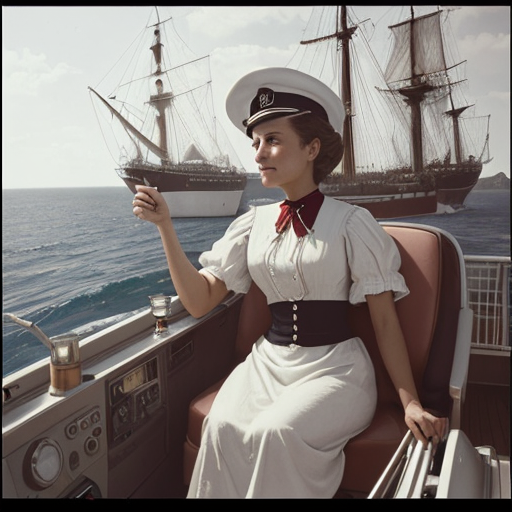

In [5]:
prompt = "A photograph of an woman driving a ship"
pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

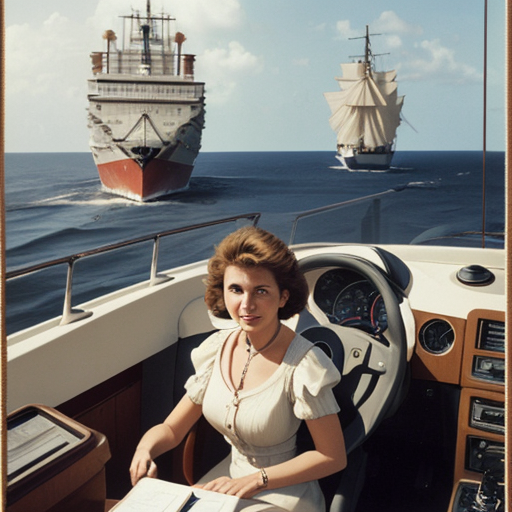

In [6]:
pipe(prompt=prompt).images[0]

# Same prompt 2 images

To control the same use `torch.manual_seed(0)`

In [7]:
torch.manual_seed(0)

  0%|          | 0/50 [00:00<?, ?it/s]

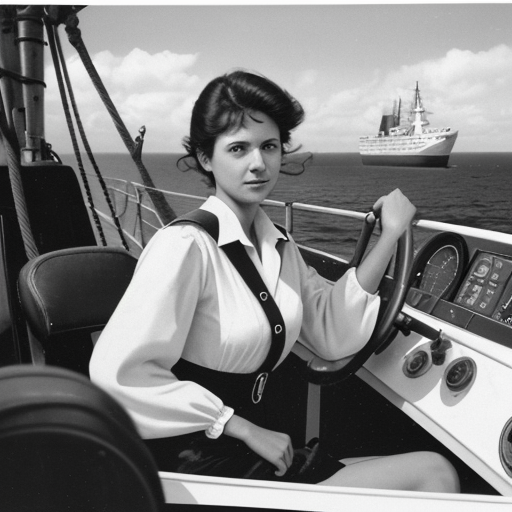

In [8]:
pipe(prompt=prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

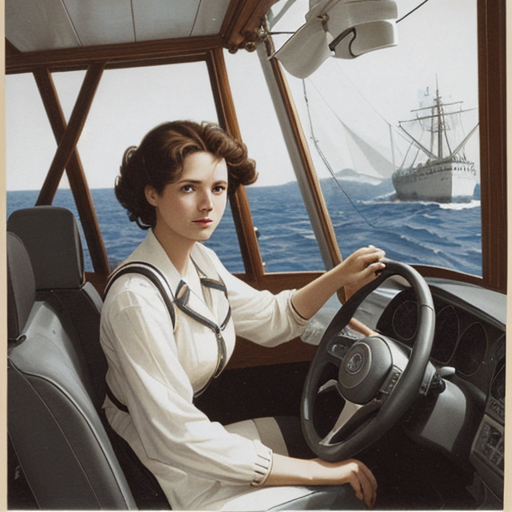

In [9]:
pipe(prompt=prompt).images[0]

# Generating Text

In [10]:
classifier = pipeline("text-classification", device=device)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


In [11]:
classifier("This movies is very pathetics, but actions made me survive")

[{'label': 'NEGATIVE', 'score': 0.5454087257385254}]

In [12]:
classifier("This movies is very pathetics, but I like actions")

[{'label': 'POSITIVE', 'score': 0.9911267161369324}]

In [13]:
set_seed(10)

In [14]:
generator = pipeline("text-generation", device=device)
prompt = "It was very dark night "

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


In [15]:
generator(prompt)[0]["generated_text"]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'It was very dark night " (Cain, "I felt really lonely at the moment!") Yui stared up into Lily\'s eyes. "How should I explain to you?" "My god..." (Mia) "Your heart'

# Generating Sound Clips

In [16]:
# !pip install timm==0.9.12
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")

Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summ

In [17]:
data = pipe("classical soft solo, very calming")
print(data)

{'audio': array([[[-0.02275619, -0.02184825, -0.02245806, ..., -0.01499061,
         -0.0157473 , -0.02002676]]], dtype=float32), 'sampling_rate': 32000}


In [18]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))

In [19]:
data["audio"][0].shape

(1, 957440)

In [20]:
957440/32000

29.92